In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('fundamentals (1).csv')

In [5]:
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [6]:
data.tail()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2530000.0,4.0,-157361000.0,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9000000.0,54.0,-184000000.0,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7000000.0,44.0,-180000000.0,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-81000000.0,32.0,-224000000.0,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08
1780,1780,ZTS,2016-12-31,1.076000e+09,15000000.0,2000000.0,55.0,-216000000.0,1.024000e+09,65.0,...,3.390000e+09,1.117000e+09,1.487000e+09,6.162000e+09,7.649000e+09,4.888000e+09,-421000000.0,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [8]:
data.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [9]:
data.shape


(1781, 79)

In [10]:
print(len(data))

1781


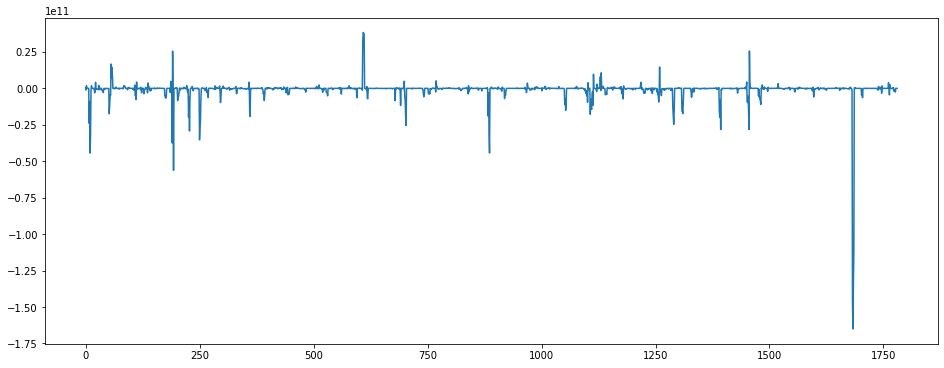

In [11]:
data['Investments'].plot(figsize=(16,6))

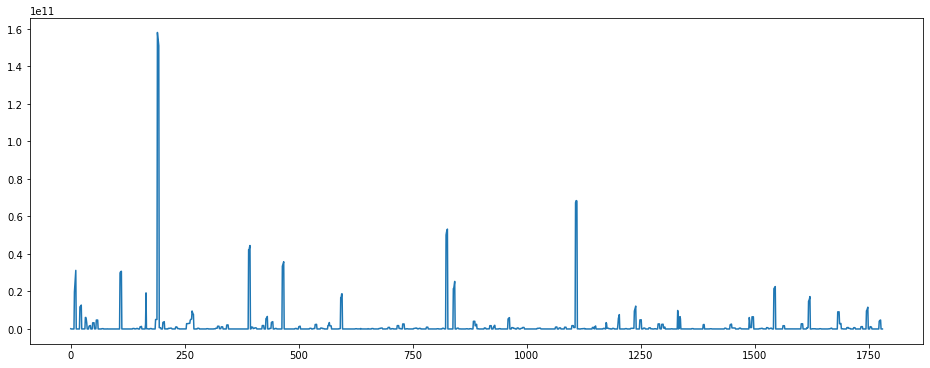

In [14]:
data['Common Stocks'].plot(figsize=(16,6))

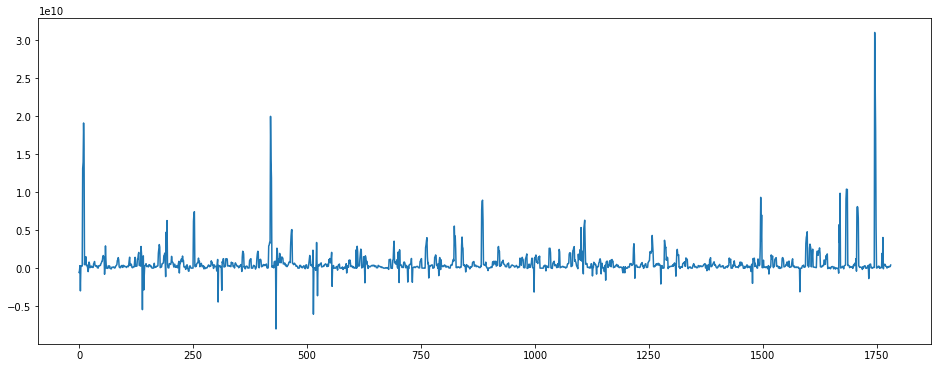

In [15]:
data['Income Tax'].plot(figsize=(16,6))

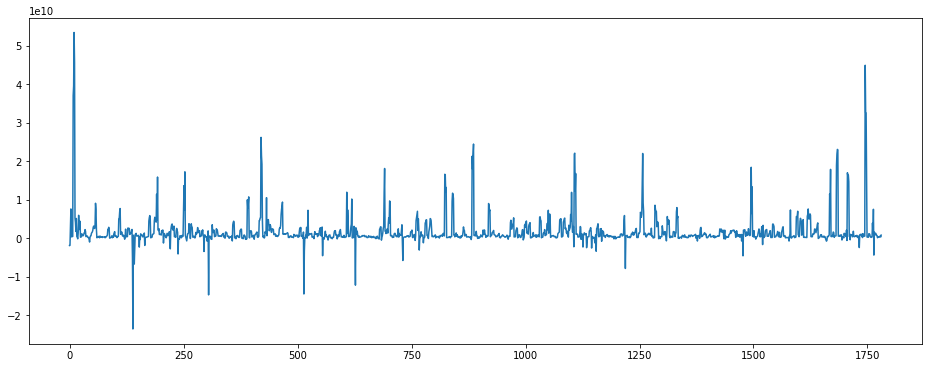

In [16]:
data['Net Income'].plot(figsize=(16,6))

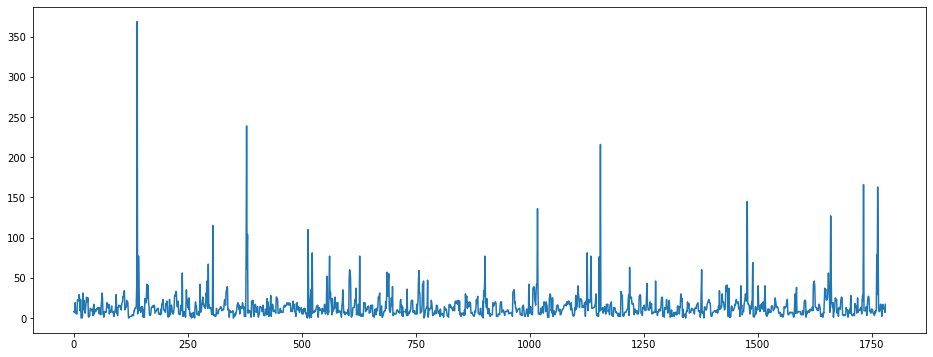

In [17]:
data['Profit Margin'].plot(figsize=(16,6))

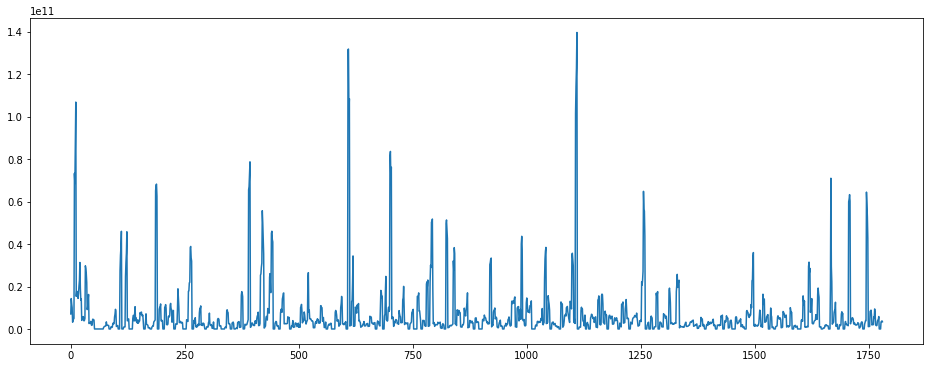

In [19]:
data['Total Current Assets'].plot(figsize=(16,6))

In [20]:
x = data[['Investments','Common Stocks','Income Tax','Net Income','Profit Margin']]
y = data['Total Current Assets']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [22]:
x_train.shape

(1335, 5)

In [23]:
x_test.shape

(446, 5)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
print(regressor.coef_)

[ 6.27115239e-01  3.71897923e-01 -1.10501926e+00  2.62764844e+00
  2.35057783e+07]


In [28]:
print(regressor.intercept_)

2755015309.5137467


In [31]:
predict=regressor.predict(x_test)

In [32]:
print(predict)

[ 4.72072322e+09  4.17655937e+09  4.35921973e+09  4.39449199e+09
  4.05156907e+09  3.56879614e+09  4.25673008e+09 -4.35689988e+09
  1.58635796e+10  4.55221883e+09  4.73267029e+09  5.61579447e+09
  1.38772275e+10  2.81183709e+09  3.59064969e+09  5.43513077e+10
  3.90204290e+09  4.86181952e+09  4.19589523e+09  1.92151061e+10
  2.65346128e+09  7.50125192e+09  8.61699168e+09  3.85237601e+09
  5.71803642e+09 -4.59997751e+10  4.67292073e+09  5.45988103e+09
  8.57015468e+09  4.03385269e+10  2.77952973e+09  6.08339098e+09
  2.50293054e+09  4.22311147e+09  4.41387392e+09 -7.49516928e+09
  3.89286320e+09  3.97556992e+09  3.55365076e+09  1.25473889e+10
  3.67786200e+10  4.00029291e+09  6.54935636e+09  2.07790868e+09
  3.86598788e+09  5.08879138e+09  7.09860807e+09  4.10464532e+09
  3.84005888e+09  5.30138100e+09  1.06233030e+10  3.50570826e+09
  3.77751253e+09  4.46687173e+09  4.31789008e+09  3.84457454e+09
  3.31729050e+09  3.60896579e+10  3.59537277e+09  3.79774472e+09
  6.48126053e+09  3.90281

In [33]:
predict.shape

(446,)

In [35]:
dframe=pd.DataFrame(y_test,predict)

In [38]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predict})

In [39]:
print(dfr)

            Actual     Predicted
1337  1.509210e+09  4.720723e+09
1411  1.539100e+09  4.176559e+09
1182  6.441888e+09  4.359220e+09
962   4.232000e+09  4.394492e+09
1739  0.000000e+00  4.051569e+09
...            ...           ...
372   8.414280e+08  3.538856e+09
1389  1.378000e+09  5.878571e+09
1529  6.772560e+09  7.552416e+09
211   2.047100e+09  3.584627e+09
1620  2.670600e+10  2.665063e+10

[446 rows x 2 columns]


In [40]:
predict.shape

(446,)

In [41]:
dfr.head(5)

,Actual,Predicted
1337,1.509210e+09,4.720723e+09
1411,1.539100e+09,4.176559e+09
1182,6.441888e+09,4.359220e+09
962,4.232000e+09,4.394492e+09
1739,0.000000e+00,4.051569e+09


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
regressor.score(x_test,y_test)

0.17365908737885238

In [44]:
import math

In [45]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error :  5360580948.870374


In [47]:
print('Mean Square Error : ',metrics.mean_squared_error(y_test,predict))

Mean Square Error :  1.3300054641554429e+20


In [48]:
print('Root Mean Square Error : ',math.sqrt(metrics.mean_squared_error(y_test,predict)))

Root Mean Square Error :  11532586284.764761


In [49]:
graph=dfr.head(5)

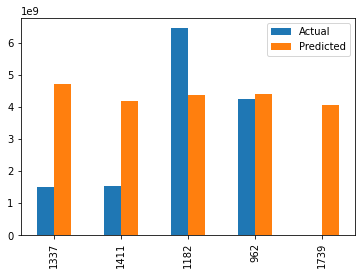

In [50]:
graph.plot(kind='bar')

In [ ]:
#Thus, we assume that linear relationship is present but in real-time , it may not necessarily be present. 
#Stock Prices can never be predicted because it is influenve by a lot of factors.